In [1]:
%matplotlib inline

import json
import pandas as pd
import numpy as np
from utils import results_heatmap

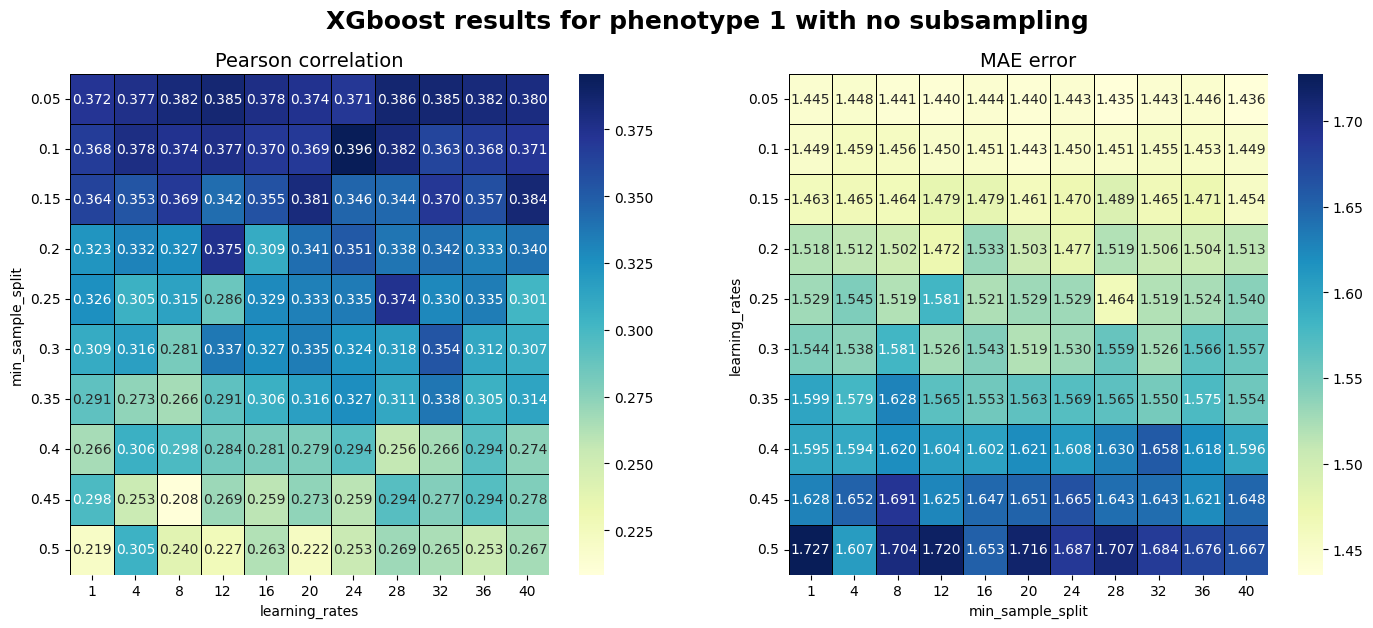

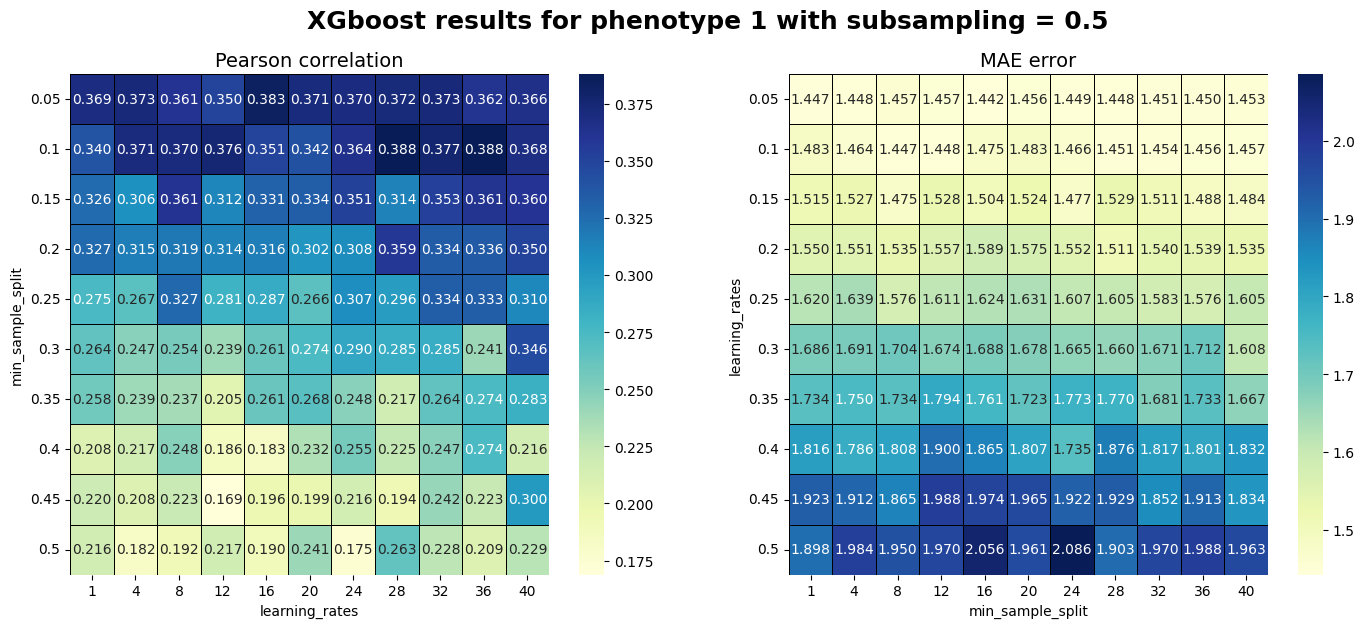

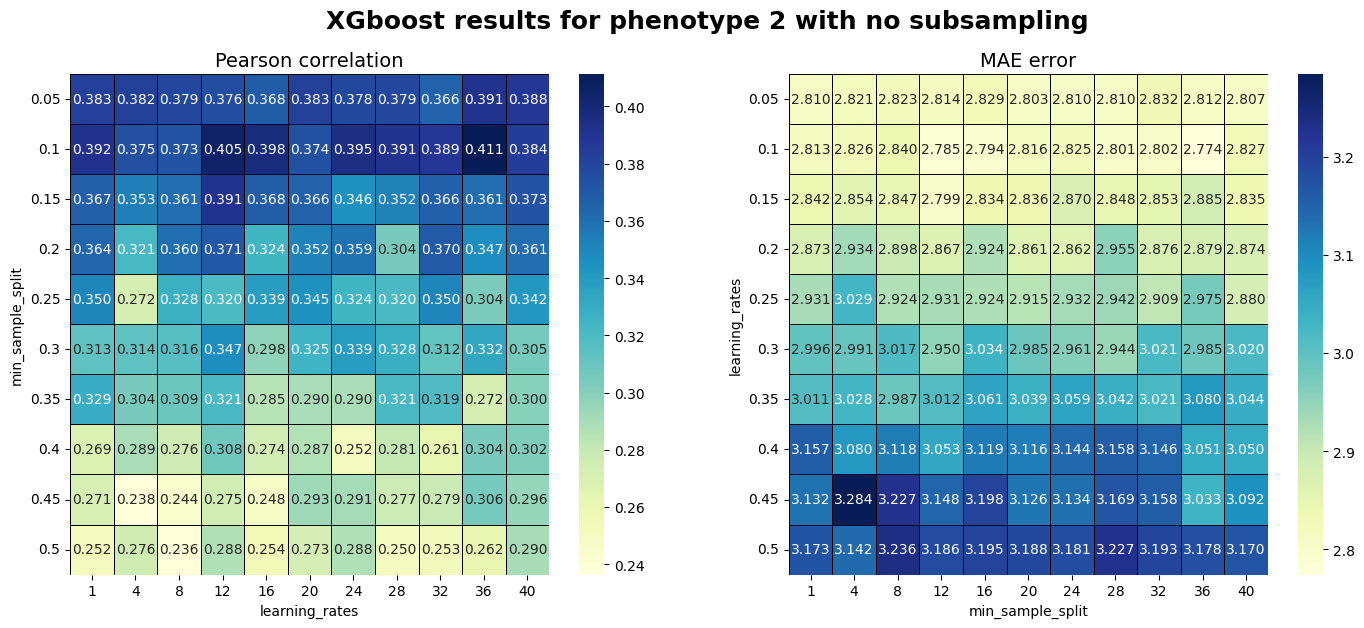

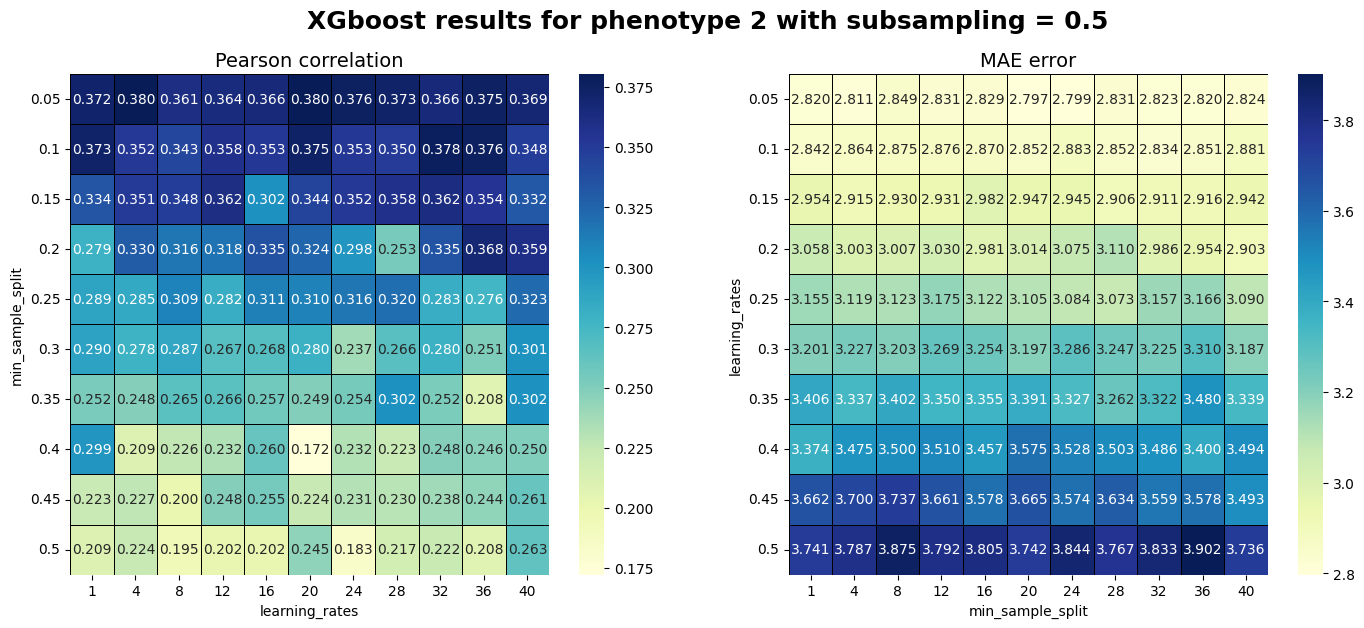

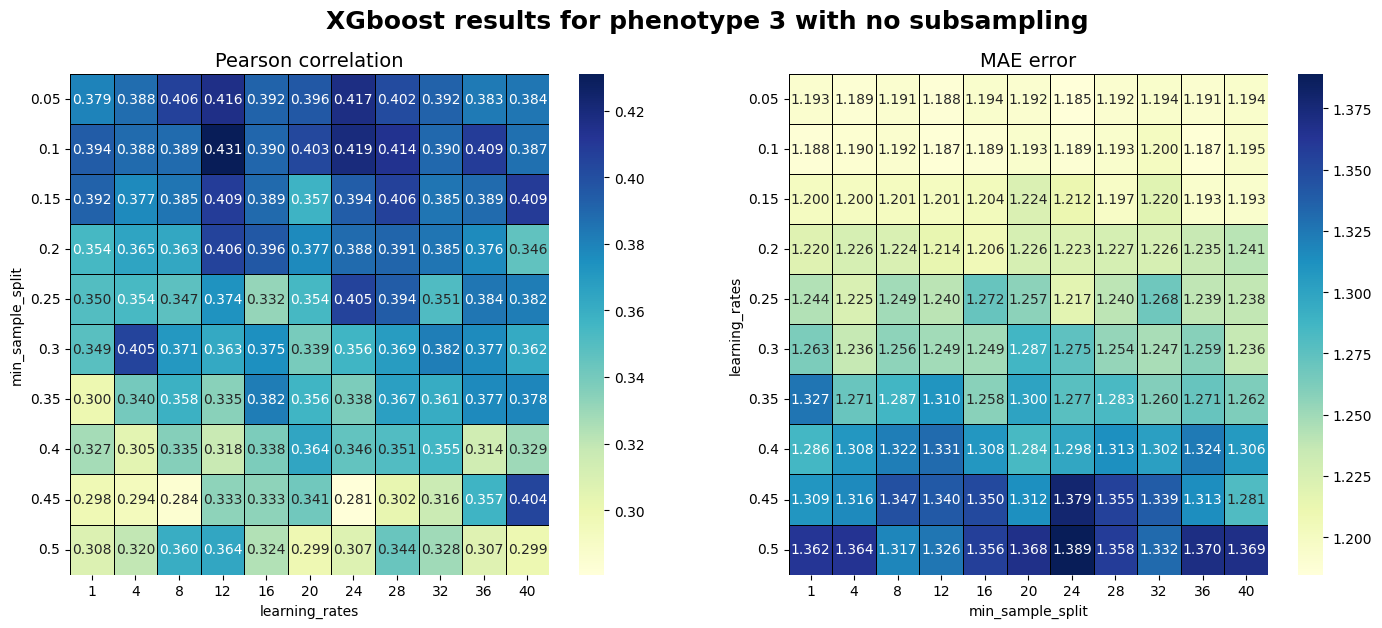

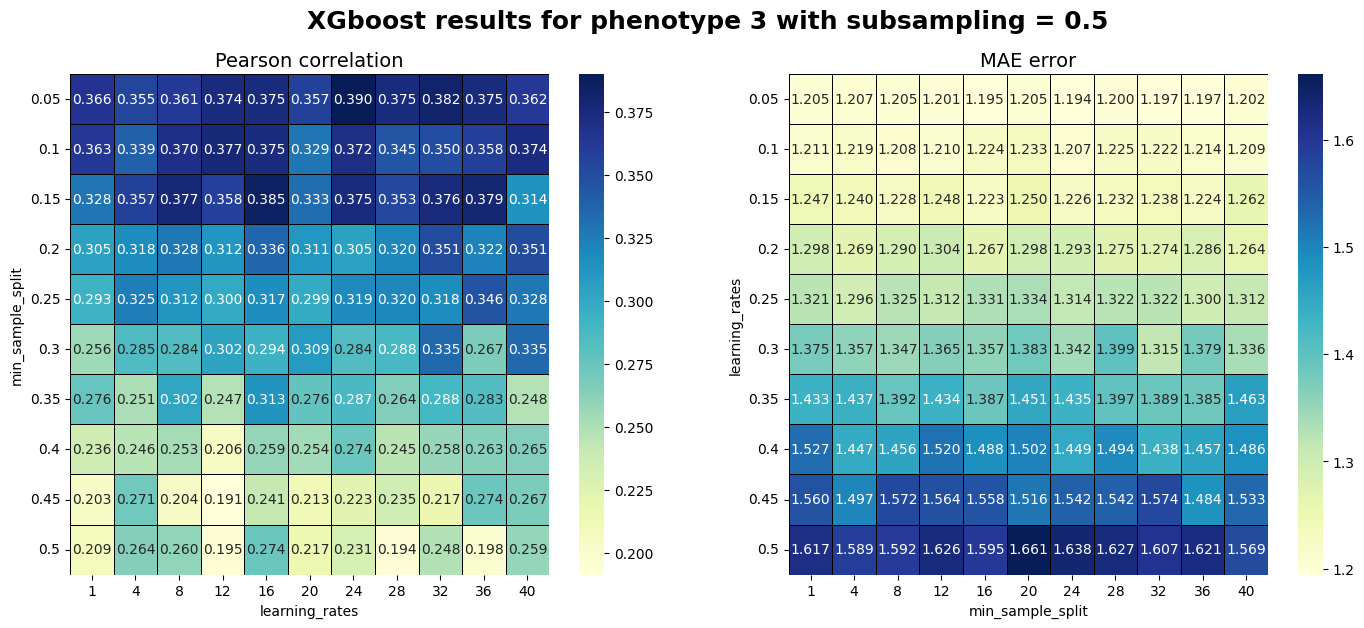

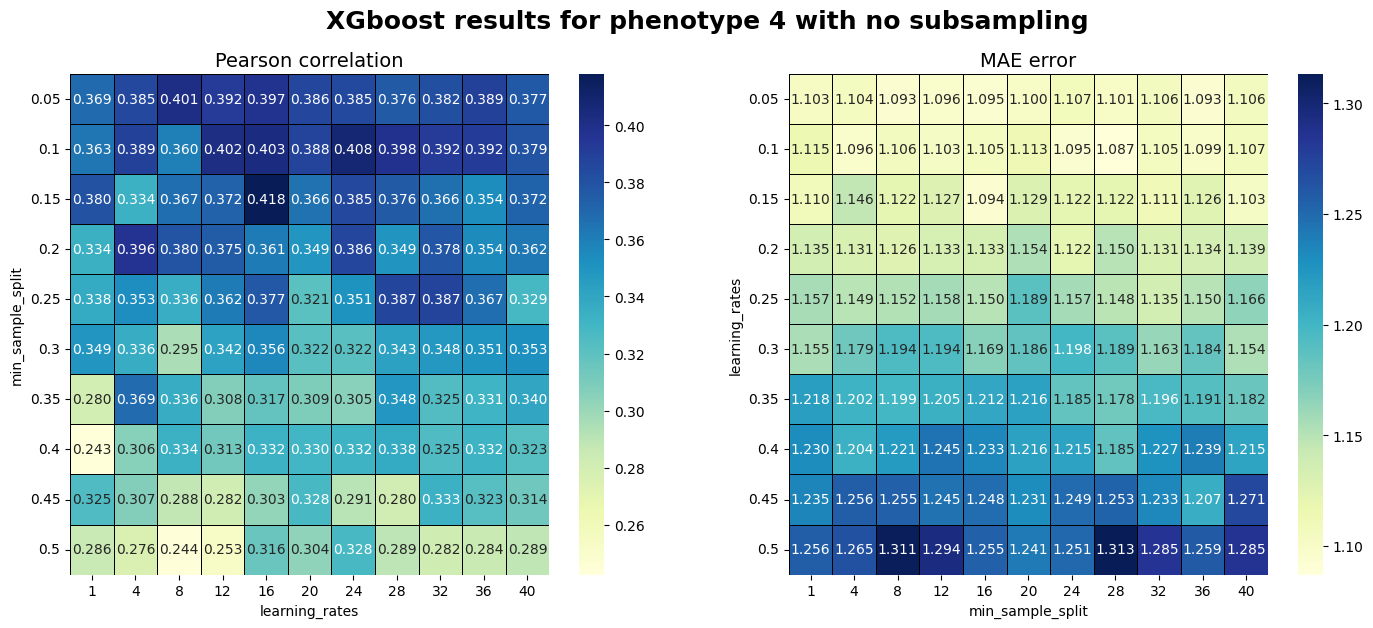

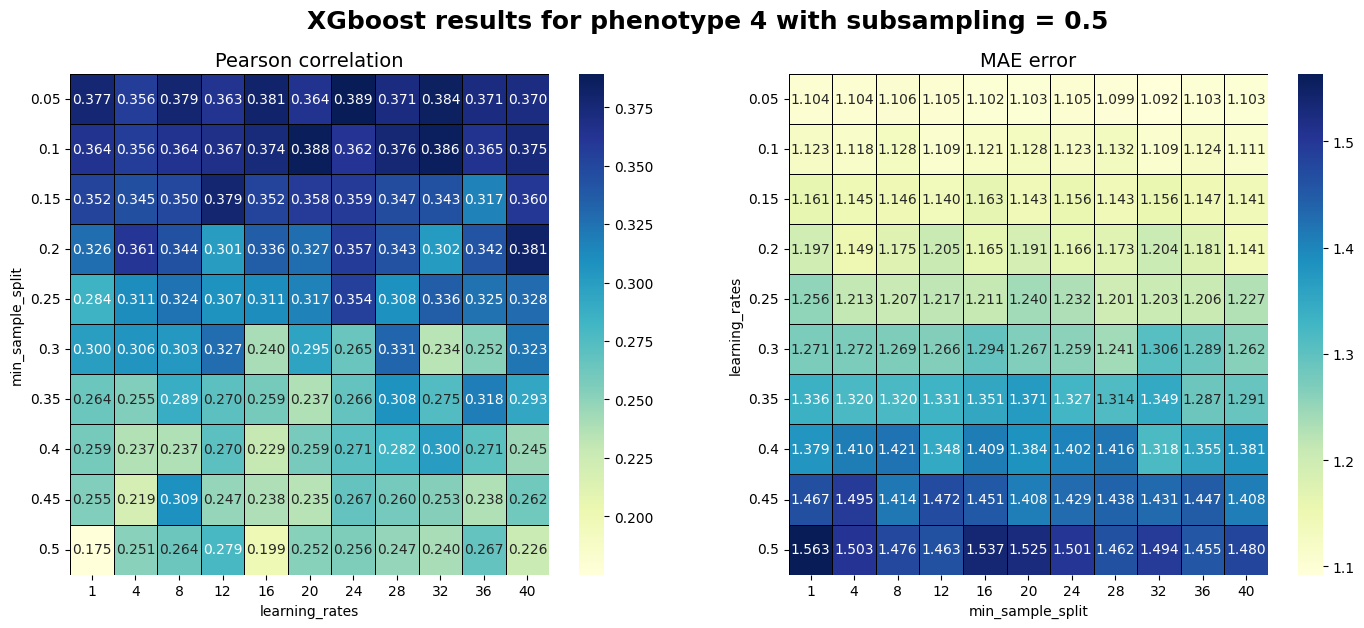

In [2]:
with open("Results/xgboost_all_results.json", "r") as f:
    results = json.load(f)

for i in range(len(results["dim_0_values"])):
    for j, sub_sampling_value in enumerate(results["dim_1_values"]):
        if sub_sampling_value == 1.0:
            title_suffix = "no subsampling"
        else:
            title_suffix = f"subsampling = {sub_sampling_value}"

        corr_df = pd.DataFrame(np.array(results["correlation"])[i,j], index= results["dim_2_values"], columns= results["dim_3_values"]).sort_index()
        MAE_df = pd.DataFrame(np.array(results["MAE"])[i,j], index= results["dim_2_values"], columns= results["dim_3_values"]).sort_index()

        results_heatmap(corr_df, MAE_df, f"XGboost results for phenotype {i + 1} with " + title_suffix, "Pearson correlation", "MAE error", results["dim_2_label"],  results["dim_3_label"])